## WeRateDogs Analysis

###  Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry
from tweepy import Stream
import time

## GATHERING DATA

### Read the Twitter archive csv into Pandas

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

### Gather image predictions data

In [3]:
#### I had to import 'HTTPAdapter' and 'Retry' because I kept on getting a 'ConnectionError:max retries exceeded'
folder_name = 'image_folder'

session = requests.Session()
retry = Retry(connect=3, backoff_factor=0.5)
adapter = HTTPAdapter(max_retries=retry)
session.mount('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', adapter)
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response=session.get(url)
with open('image-predictions.tsv', 'wb') as file:
            file.write(response.content)
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

### Gather data from the Twitter API

In [4]:
# defining codes

access_token = 'abc'
access_secret = 'abc'
consumer_key='abc'
consumer_secret='abc'
bearer_token='abc'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

In [5]:
tweet_ids = twitter_archive.tweet_id.values

In [6]:
# From the twitter API, get the JSON data for each tweet using the tweet id
tweets_not_available=[]
start=time.time()
print(start)
count = 0
# write each tweet's returned JSON data as a new line in a .txt file
with open('tweet_json.txt', 'w') as file:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print('Number', count, ':Success')
            # json dump to convert python object to a json string
            json.dump(tweet._json, file)
            file.write('\n')
        except Exception as e:
            print('Number', count, ':Fail')
            tweets_not_available.append(tweet_id)
            pass
end=time.time()
print(end)
time_used = end-start
print(time_used)
# to check the time used

1662459858.1235206
Number 1 :Success
Number 2 :Success
Number 3 :Success
Number 4 :Success
Number 5 :Success
Number 6 :Success
Number 7 :Success
Number 8 :Success
Number 9 :Success
Number 10 :Success
Number 11 :Success
Number 12 :Success
Number 13 :Success
Number 14 :Success
Number 15 :Success
Number 16 :Success
Number 17 :Success
Number 18 :Success
Number 19 :Success
Number 20 :Fail
Number 21 :Success
Number 22 :Success
Number 23 :Success
Number 24 :Success
Number 25 :Success
Number 26 :Success
Number 27 :Success
Number 28 :Success
Number 29 :Success
Number 30 :Success
Number 31 :Success
Number 32 :Success
Number 33 :Success
Number 34 :Success
Number 35 :Success
Number 36 :Success
Number 37 :Success
Number 38 :Success
Number 39 :Success
Number 40 :Success
Number 41 :Success
Number 42 :Success
Number 43 :Success
Number 44 :Success
Number 45 :Success
Number 46 :Success
Number 47 :Success
Number 48 :Success
Number 49 :Success
Number 50 :Success
Number 51 :Success
Number 52 :Success
Numbe

Number 418 :Success
Number 419 :Success
Number 420 :Success
Number 421 :Success
Number 422 :Success
Number 423 :Success
Number 424 :Success
Number 425 :Success
Number 426 :Success
Number 427 :Success
Number 428 :Success
Number 429 :Success
Number 430 :Success
Number 431 :Success
Number 432 :Success
Number 433 :Success
Number 434 :Success
Number 435 :Success
Number 436 :Success
Number 437 :Success
Number 438 :Success
Number 439 :Success
Number 440 :Success
Number 441 :Success
Number 442 :Success
Number 443 :Success
Number 444 :Success
Number 445 :Success
Number 446 :Success
Number 447 :Success
Number 448 :Success
Number 449 :Success
Number 450 :Success
Number 451 :Success
Number 452 :Success
Number 453 :Success
Number 454 :Success
Number 455 :Success
Number 456 :Success
Number 457 :Success
Number 458 :Success
Number 459 :Success
Number 460 :Success
Number 461 :Success
Number 462 :Success
Number 463 :Success
Number 464 :Success
Number 465 :Success
Number 466 :Success
Number 467 :Success


Number 829 :Success
Number 830 :Success
Number 831 :Success
Number 832 :Success
Number 833 :Success
Number 834 :Success
Number 835 :Success
Number 836 :Success
Number 837 :Success
Number 838 :Success
Number 839 :Success
Number 840 :Success
Number 841 :Success
Number 842 :Fail
Number 843 :Success
Number 844 :Success
Number 845 :Success
Number 846 :Success
Number 847 :Success
Number 848 :Success
Number 849 :Success
Number 850 :Success
Number 851 :Success
Number 852 :Success
Number 853 :Success
Number 854 :Success
Number 855 :Success
Number 856 :Success
Number 857 :Success
Number 858 :Success
Number 859 :Success
Number 860 :Success
Number 861 :Success
Number 862 :Success
Number 863 :Success
Number 864 :Success
Number 865 :Success
Number 866 :Success
Number 867 :Success
Number 868 :Success
Number 869 :Success
Number 870 :Success
Number 871 :Success
Number 872 :Success
Number 873 :Success
Number 874 :Success
Number 875 :Success
Number 876 :Success
Number 877 :Success
Number 878 :Success
Num

Rate limit reached. Sleeping for: 35


Number 901 :Success
Number 902 :Success
Number 903 :Success
Number 904 :Success
Number 905 :Success
Number 906 :Success
Number 907 :Success
Number 908 :Success
Number 909 :Success
Number 910 :Success
Number 911 :Success
Number 912 :Success
Number 913 :Success
Number 914 :Success
Number 915 :Success
Number 916 :Success
Number 917 :Success
Number 918 :Success
Number 919 :Success
Number 920 :Success
Number 921 :Success
Number 922 :Success
Number 923 :Success
Number 924 :Success
Number 925 :Success
Number 926 :Success
Number 927 :Success
Number 928 :Success
Number 929 :Success
Number 930 :Success
Number 931 :Success
Number 932 :Success
Number 933 :Fail
Number 934 :Success
Number 935 :Success
Number 936 :Success
Number 937 :Success
Number 938 :Success
Number 939 :Success
Number 940 :Success
Number 941 :Success
Number 942 :Success
Number 943 :Success
Number 944 :Success
Number 945 :Success
Number 946 :Success
Number 947 :Success
Number 948 :Success
Number 949 :Success
Number 950 :Success
Num

Number 1296 :Success
Number 1297 :Success
Number 1298 :Success
Number 1299 :Success
Number 1300 :Success
Number 1301 :Success
Number 1302 :Success
Number 1303 :Success
Number 1304 :Success
Number 1305 :Success
Number 1306 :Success
Number 1307 :Success
Number 1308 :Success
Number 1309 :Success
Number 1310 :Success
Number 1311 :Success
Number 1312 :Success
Number 1313 :Success
Number 1314 :Success
Number 1315 :Success
Number 1316 :Success
Number 1317 :Success
Number 1318 :Success
Number 1319 :Success
Number 1320 :Success
Number 1321 :Success
Number 1322 :Success
Number 1323 :Success
Number 1324 :Success
Number 1325 :Success
Number 1326 :Success
Number 1327 :Success
Number 1328 :Success
Number 1329 :Success
Number 1330 :Success
Number 1331 :Success
Number 1332 :Success
Number 1333 :Success
Number 1334 :Success
Number 1335 :Success
Number 1336 :Success
Number 1337 :Success
Number 1338 :Success
Number 1339 :Success
Number 1340 :Success
Number 1341 :Success
Number 1342 :Success
Number 1343 :

Number 1687 :Success
Number 1688 :Success
Number 1689 :Success
Number 1690 :Success
Number 1691 :Success
Number 1692 :Success
Number 1693 :Success
Number 1694 :Success
Number 1695 :Success
Number 1696 :Success
Number 1697 :Success
Number 1698 :Success
Number 1699 :Success
Number 1700 :Success
Number 1701 :Success
Number 1702 :Success
Number 1703 :Success
Number 1704 :Success
Number 1705 :Success
Number 1706 :Success
Number 1707 :Success
Number 1708 :Success
Number 1709 :Success
Number 1710 :Success
Number 1711 :Success
Number 1712 :Success
Number 1713 :Success
Number 1714 :Success
Number 1715 :Success
Number 1716 :Success
Number 1717 :Success
Number 1718 :Success
Number 1719 :Success
Number 1720 :Success
Number 1721 :Success
Number 1722 :Success
Number 1723 :Success
Number 1724 :Success
Number 1725 :Success
Number 1726 :Success
Number 1727 :Fail
Number 1728 :Success
Number 1729 :Success
Number 1730 :Success
Number 1731 :Success
Number 1732 :Success
Number 1733 :Success
Number 1734 :Suc

Rate limit reached. Sleeping for: 130


Number 1801 :Success
Number 1802 :Success
Number 1803 :Success
Number 1804 :Success
Number 1805 :Success
Number 1806 :Success
Number 1807 :Success
Number 1808 :Success
Number 1809 :Success
Number 1810 :Success
Number 1811 :Success
Number 1812 :Success
Number 1813 :Success
Number 1814 :Success
Number 1815 :Success
Number 1816 :Success
Number 1817 :Success
Number 1818 :Success
Number 1819 :Success
Number 1820 :Success
Number 1821 :Success
Number 1822 :Success
Number 1823 :Success
Number 1824 :Success
Number 1825 :Success
Number 1826 :Success
Number 1827 :Success
Number 1828 :Success
Number 1829 :Success
Number 1830 :Success
Number 1831 :Success
Number 1832 :Success
Number 1833 :Success
Number 1834 :Success
Number 1835 :Success
Number 1836 :Success
Number 1837 :Success
Number 1838 :Success
Number 1839 :Success
Number 1840 :Success
Number 1841 :Success
Number 1842 :Success
Number 1843 :Success
Number 1844 :Success
Number 1845 :Success
Number 1846 :Success
Number 1847 :Success
Number 1848 :

Number 2192 :Success
Number 2193 :Success
Number 2194 :Success
Number 2195 :Success
Number 2196 :Success
Number 2197 :Success
Number 2198 :Success
Number 2199 :Success
Number 2200 :Success
Number 2201 :Success
Number 2202 :Success
Number 2203 :Success
Number 2204 :Success
Number 2205 :Success
Number 2206 :Success
Number 2207 :Success
Number 2208 :Success
Number 2209 :Success
Number 2210 :Success
Number 2211 :Success
Number 2212 :Success
Number 2213 :Success
Number 2214 :Success
Number 2215 :Success
Number 2216 :Success
Number 2217 :Success
Number 2218 :Success
Number 2219 :Success
Number 2220 :Success
Number 2221 :Success
Number 2222 :Success
Number 2223 :Success
Number 2224 :Success
Number 2225 :Success
Number 2226 :Success
Number 2227 :Success
Number 2228 :Success
Number 2229 :Success
Number 2230 :Success
Number 2231 :Success
Number 2232 :Success
Number 2233 :Success
Number 2234 :Success
Number 2235 :Success
Number 2236 :Success
Number 2237 :Success
Number 2238 :Success
Number 2239 :

In [7]:
tweet_json_list=[]

with open('tweet_json.txt', 'r') as file:
    for line in file:
        # convert json string into a dictionaru
        each_line=json.loads(line)
        # get required information
        tweet_id=each_line['id']
        retweet_count=each_line['retweet_count']
        fav_count=each_line['favorite_count']
        # append to a list
        tweet_json_list.append({'id':tweet_id, 'retweet_count':retweet_count, 'favorite_count':fav_count})
        # convert list to dataframe
        

In [8]:
tweet_json=pd.DataFrame(tweet_json_list, columns=['id','retweet_count', 'favorite_count'])

## ASSESSING DATA

Used Excel and Pandas to assess the data

In [9]:
twitter_archive.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1582,687109925361856513,NaN,NaN,2016-01-13 03:12:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Baxter. He looks like a fun dog. Prefe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687109925...,11,10,Baxter,None,None,None,None
960,751205363882532864,NaN,NaN,2016-07-08 00:04:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""This photographer took pics of her best frien...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/751205363...,12,10,None,None,None,None,None


In [10]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [12]:
image_predictions.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
847,695409464418041856,https://pbs.twimg.com/media/CaaXN5LUYAEzAh-.jpg,1,pug,0.997445,True,bull_mastiff,0.001749,True,Pekinese,0.000304,True
1750,823939628516474880,https://pbs.twimg.com/media/C284uD8WgAEmMVn.jpg,1,schipperke,0.234076,True,curly-coated_retriever,0.193093,True,Labrador_retriever,0.095197,True
1956,864873206498414592,https://pbs.twimg.com/media/DAClmHkXcAA1kSv.jpg,2,pole,0.478616,False,lakeside,0.114182,False,wreck,0.055926,False


In [13]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
tweet_json.sample(3)

,id,retweet_count,favorite_count
876,758405701903519748,1756,4859
1830,675497103322386432,1130,2815
1767,677301033169788928,354,1111


In [15]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2326 non-null   int64
 1   retweet_count   2326 non-null   int64
 2   favorite_count  2326 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [36]:
# Check for duplicated rows
sum(twitter_archive.duplicated())

0

## Quality

#### Twitter_archive

1. Some tweet ids e.g '667509364010450944' has 'None', 'actually', 'a', 'an', 'getting, 'mad' etc for name.
   I noticed the names that start with lowercase are the wrong names
2. Nulls represented as 'none' etc in doggo, floofer, pupper, puppo columns
3. Rating denominators are greater or less than '10'
4. id '835246439529840000' has Rating denominator of '0' 
5. No dog stage for some dogs e.g '796116448414461957'
6. Most rows under 'in reply to status id' column are empty
7. Most rows under 'in reply to user id' column are empty
8. 'id', 'tweet_id' don't have same column names
9. 'retweeted_status_timestamp' and 'timestamp' have wrong datatypes
10. text column contains web links

#### Image predictions

1. Some image predictions have 3 'False'


## Tidiness

1. 'dog stage' variable is split into 4 columns - doggo, floofer, pupper, puppo
2. 'retweet count' and 'favorite count' columns are not in the twitter_archive

## CLEANING DATA

Make copies of the dataframes

In [16]:
# copy df
twitter_archive_copy = twitter_archive.copy()
image_predictions_copy = image_predictions.copy()

#### Define
Change 'tweet_id' in 'twitter_archive' to 'id' to be able to merge the columns

#### Code

In [17]:
twitter_archive_copy.rename(columns={'tweet_id':'id'},inplace=True)

#### Test

In [18]:
twitter_archive_copy.sample(4)

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1743,679405845277462528,NaN,NaN,2015-12-22 20:59:10 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Crazy unseen footage from Jurassic Park. 10/10...,NaN,NaN,NaN,https://vine.co/v/iKVFEigMLxP,10,10,None,None,None,None,None
134,866686824827068416,NaN,NaN,2017-05-22 16:06:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lili. She can't believe you betrayed h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866686824...,12,10,Lili,None,None,None,None
2181,668994913074286592,NaN,NaN,2015-11-24 03:29:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two gorgeous pups here. Both have cute fake ho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668994913...,5,10,None,None,None,None,None
1582,687109925361856513,NaN,NaN,2016-01-13 03:12:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Baxter. He looks like a fun dog. Prefe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687109925...,11,10,Baxter,None,None,None,None


#### Define
Add 'retweet count' and 'favorite count' columns from tweet_json df to twitter_archive df

#### Code

In [19]:
twitter_archive_copy = pd.merge(twitter_archive_copy, tweet_json, on ='id', how='left')

#### Test

In [20]:
twitter_archive_copy.sample(4)

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
399,824796380199809024,NaN,NaN,2017-01-27 01:49:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bailey. She loves going...,7.950767e+17,4.196984e+09,2016-11-06 01:33:58 +0000,https://twitter.com/dog_rates/status/795076730...,11,10,Bailey,None,None,None,None,5078.0,0.0
120,869702957897576449,NaN,NaN,2017-05-30 23:51:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Stanley. He likes road trips. Will shift ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869702957...,13,10,Stanley,None,None,None,None,5363.0,24968.0
1554,688898160958271489,NaN,NaN,2016-01-18 01:38:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you have a ton of work to do but then rem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688898160...,10,10,None,None,None,None,None,710.0,1920.0
2330,666362758909284353,NaN,NaN,2015-11-16 21:10:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unique dog here. Very small. Lives in containe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666362758...,6,10,None,None,None,None,None,467.0,649.0


#### Define
Convert float datatypes to integers for 'retweet count' and 'favorite count' columns

#### Code

In [21]:
'''I keep getting 'Cannot convert non-finite values (NA or inf) to integer' 
when trying to convert favorite_count and retweet_count to int
so I filled missing rows with '0' to be able to do that'''
twitter_archive_copy = twitter_archive_copy.fillna(0)

In [22]:
twitter_archive_copy = twitter_archive_copy.astype({'favorite_count':'int', 'retweet_count':'int'})

#### Test

In [23]:
twitter_archive_copy.sample(4)

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
1363,702932127499816960,0.0,0.0,2016-02-25 19:04:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chip. He's an Upper West Nile Pantaloo...,0.0,0.0,0,https://twitter.com/dog_rates/status/702932127...,6,10,Chip,None,None,None,None,650,2367
226,848690551926992896,0.0,0.0,2017-04-03 00:16:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in animals other than dogs...,0.0,0.0,0,https://twitter.com/dog_rates/status/848690551...,12,10,None,None,None,None,None,3913,23223
241,846505985330044928,0.0,0.0,2017-03-27 23:35:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",THIS WAS NOT HIS FAULT HE HAD NO IDEA. 11/10 S...,0.0,0.0,0,https://twitter.com/shomaristone/status/846484...,11,10,None,None,None,None,None,2752,13035
2093,670780561024270336,0.0,0.0,2015-11-29 01:45:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Traviss. He has no ears. Two rare dogs...,0.0,0.0,0,https://twitter.com/dog_rates/status/670780561...,7,10,Traviss,None,None,None,None,249,697


#### Define
Some other columns turned their NaNs to 0 which I don't want, so I'll convert them back to NaNs

#### Code

In [70]:
twitter_archive_copy['in_reply_to_status_id'].replace(0.0, np.NaN, inplace=True)
twitter_archive_copy['in_reply_to_user_id'].replace(0.0, np.NaN, inplace=True)
twitter_archive_copy['retweeted_status_user_id'].replace(0.0, np.NaN, inplace=True)
twitter_archive_copy['retweeted_status_timestamp'].replace(0.0, np.NaN, inplace=True)
twitter_archive_copy['retweeted_status_id'].replace(0.0, np.NaN, inplace=True)

C:\Users\23490\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


#### Test

In [73]:
twitter_archive_copy

2015-12-02 03:40:57 +0000    1
2016-09-07 15:44:53 +0000    1
2016-08-15 16:22:20 +0000    1
2016-12-09 06:17:20 +0000    1
2016-08-28 16:51:16 +0000    1
                            ..
2016-10-25 16:00:09 +0000    1
2017-03-16 00:00:07 +0000    1
2017-05-27 19:39:34 +0000    1
2016-10-02 23:23:04 +0000    1
2015-11-28 03:31:48 +0000    1
Name: retweeted_status_timestamp, Length: 111, dtype: int64

#### Define
Join different dog_stage columns into one 

#### Code

In [24]:
columns = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_copy['dog_stage'] = twitter_archive_copy[columns].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

#### Test

In [25]:
twitter_archive_copy.sample(4)

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,dog_stage
1762,678643457146150913,0.0,0.0,2015-12-20 18:29:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizz. He just arrived. Couldn't wait unt...,0.0,0.0,0,https://twitter.com/dog_rates/status/678643457...,10,10,Grizz,None,None,None,None,359,1874,None_None_None_None
1812,676811746707918848,0.0,0.0,2015-12-15 17:11:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Penny &amp; Gizmo. They are pract...,0.0,0.0,0,https://twitter.com/dog_rates/status/676811746...,9,10,Penny,None,None,None,None,379,1302,None_None_None_None
713,784183165795655680,0.0,0.0,2016-10-07 00:06:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Reginald. He's one magical puppo. Aero...,0.0,0.0,0,https://vine.co/v/5ghHLBMMdlV,12,10,Reginald,None,None,None,puppo,7431,18883,None_None_None_puppo
49,882762694511734784,0.0,0.0,2017-07-06 00:46:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,0.0,0.0,0,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,None,None,pupper,None,4077,24695,None_None_pupper_None


#### Define
Replace 'None and '_' with no character and separate joined dog stages

#### Code

In [26]:
twitter_archive_copy['dog_stage'] = twitter_archive_copy['dog_stage'].str.replace('None','')
twitter_archive_copy['dog_stage'] = twitter_archive_copy['dog_stage'].str.replace('_','')

In [27]:
# Separate joined dog stages
twitter_archive_copy['dog_stage'] = twitter_archive_copy['dog_stage'].str.replace('doggopupper', 'doggo, pupper')
twitter_archive_copy['dog_stage'] = twitter_archive_copy['dog_stage'].str.replace('doggopuppo', 'doggo, puppo')
twitter_archive_copy['dog_stage'] = twitter_archive_copy['dog_stage'].str.replace('doggofloofer', 'doggo, floofer')

#### Test

In [28]:
twitter_archive_copy['dog_stage'].value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64

In [75]:
twitter_archive_copy.sample(4)

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
2291,667165590075940865,NaN,NaN,2015-11-19 02:20:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Churlie. AKA Fetty Woof. Lost eye savi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667165590...,10,10,Churlie,964,2373,
158,861005113778896900,NaN,NaN,2017-05-06 23:49:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Burt. He thinks your thesis statement ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/861005113...,12,10,Burt,3319,14942,
324,834086379323871233,NaN,NaN,2017-02-21 17:04:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lipton. He's a West Romanian Snuggle P...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834086379...,12,10,Lipton,2037,12216,
1881,675003128568291329,NaN,NaN,2015-12-10 17:24:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Laela. She's adorable. Magnificent eyes. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675003128...,12,10,Laela,406,1388,


#### Define
Drop columns that are not needed

#### Code

In [30]:
twitter_archive_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1, inplace=True)

#### Test

In [31]:
twitter_archive_copy

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
0,892420643555336193,0.0,0.0,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,0.0,0.0,0,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,6969,33696,
1,892177421306343426,0.0,0.0,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,0.0,0.0,0,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,5272,29220,
2,891815181378084864,0.0,0.0,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,0.0,0.0,0,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,3464,21978,
3,891689557279858688,0.0,0.0,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,0.0,0.0,0,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,7191,36787,
4,891327558926688256,0.0,0.0,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,0.0,0.0,0,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,7715,35180,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,0.0,0.0,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0.0,0.0,0,https://twitter.com/dog_rates/status/666049248...,5,10,None,36,88,
2352,666044226329800704,0.0,0.0,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0.0,0.0,0,https://twitter.com/dog_rates/status/666044226...,6,10,a,115,246,
2353,666033412701032449,0.0,0.0,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0.0,0.0,0,https://twitter.com/dog_rates/status/666033412...,9,10,a,36,100,
2354,666029285002620928,0.0,0.0,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0.0,0.0,0,https://twitter.com/dog_rates/status/666029285...,7,10,a,39,112,


#### Define

Rows under the 'name' column in twitter_archive_copy would be converted to Nulls 

#### Code

In [32]:
twitter_archive_copy['name']= twitter_archive_copy['name'].replace('None', np.NaN)

#### Test

In [33]:
twitter_archive_copy['name'].value_counts()

a          55
Charlie    12
Cooper     11
Lucy       11
Oliver     11
           ..
Kloey       1
Chuck       1
Mollie      1
Dutch       1
Boots       1
Name: name, Length: 956, dtype: int64

#### Define
I noticed the names that start with lowercase are the wrong names so I'd be removing names from the name column
if those values start with a lowercase

#### Code

In [34]:
mask = [x[0].isupper() if isinstance(x,str) and len(x)>0 else False for x in twitter_archive_copy['name']]
twitter_archive_copy = twitter_archive_copy[mask]

#### Test

In [35]:
twitter_archive_copy['name'].value_counts()

Charlie    12
Lucy       11
Cooper     11
Oliver     11
Tucker     10
           ..
Kollin      1
Bloop       1
Dook        1
Willy       1
Brandy      1
Name: name, Length: 931, dtype: int64

#### Define
Remove all rows with retweets by removing rows with retweeted_status_id; you can do this by filtering out rows that are not empty. This will also take care of retweeted_status_user_id and retweeted_status_timestamp.

#### Code

In [87]:
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy['retweeted_status_id'].isnull()]

#### Test

In [82]:
twitter_archive_copy['retweeted_status_id'].value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

In [84]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 2325
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          1391 non-null   int64              
 1   in_reply_to_status_id       1 non-null      float64            
 2   in_reply_to_user_id         1 non-null      float64            
 3   timestamp                   1391 non-null   datetime64[ns, UTC]
 4   source                      1391 non-null   object             
 5   text                        1391 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               1391 non-null   object             
 10  rating_numerator            1391 non-null   int64           

#### Define
Remove url links to make the 'text' column more meaningful and extract info from it

#### Code

In [124]:
twitter_archive_copy = twitter_archive_copy.replace(to_replace ='http(?:s)?:\/\/(?:www\.)?t\.co\/([a-zA-Z0-9_]+)', value = '', regex = True)

#### Test

In [125]:
example=twitter_archive_copy['text'][3]
example

'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us '

#### Define
Extract number from text column and concatenate with twitter_archive_copy

#### Code

In [142]:
# Extract the numbers which signify ratings from the text and assign to a variable
new_ratings = a.text.str.extract(r'(\d{1,4})\/(\d{1,3})', expand=True)

In [147]:
# Concatenate new_ratings to twitter_archive_copy
twitter_archive_copy=pd.concat([twitter_archive_copy , new_ratings], axis =1)

In [152]:
# Rename 0 and 1 to numerator and denominator respectively and drop the old numerator and denominator columns
twitter_archive_copy.rename(columns={0:'numerator', 1:'denominator'}, inplace=True)
# twitter_archive_copy.drop(['rating_denominator', 'rating_numerator'], axis=1, inplace=True)

In [162]:
# Convert numerator and denominator to int
twitter_archive_copy = twitter_archive_copy.astype({'numerator':'int', 'denominator':'int'})

#### Test

In [163]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 2325
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          1391 non-null   int64              
 1   in_reply_to_status_id       1 non-null      float64            
 2   in_reply_to_user_id         1 non-null      float64            
 3   timestamp                   1391 non-null   datetime64[ns, UTC]
 4   source                      1391 non-null   object             
 5   text                        1391 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               1391 non-null   object             
 10  name                        1391 non-null   object          

#### Define
Filter the dataframe to only contain denominators with 10

#### Code

In [169]:
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy['denominator'] == 10]

#### Test

In [170]:
twitter_archive_copy['denominator'].value_counts()

10    1388
Name: denominator, dtype: int64

#### Define
Remove image predictions with 3 False and merge to twitter_archive df and drop rows not needed in twitter_archive_copy

#### Code

In [173]:
false_pred = list(image_predictions_copy.query("p1_dog==False and p2_dog==False and p3_dog == False").index)
image_predictions_copy.drop(index=false_pred,inplace=True)

In [178]:
twitter_archive_copy= pd.concat([twitter_archive_copy, image_predictions_copy], axis=1)

In [182]:
twitter_archive_copy.drop(['tweet_id', 'jpg_url', 'img_num'], axis=1, inplace=True)

#### Test

In [174]:
image_predictions_copy.query("p1_dog==False and p2_dog==False and p3_dog == False").index

Int64Index([], dtype='int64')

In [183]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2325
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          1388 non-null   float64            
 1   in_reply_to_status_id       1 non-null      float64            
 2   in_reply_to_user_id         1 non-null      float64            
 3   timestamp                   1388 non-null   datetime64[ns, UTC]
 4   source                      1388 non-null   object             
 5   text                        1388 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               1388 non-null   object             
 10  name                        1388 non-null   object          

#### Define
Change 'retweeted_status_timestamp' and 'timestamp' to correct datatypes

#### Code

In [77]:
twitter_archive_copy.retweeted_status_timestamp = pd.to_datetime(twitter_archive_copy.retweeted_status_timestamp)
twitter_archive_copy.timestamp = pd.to_datetime(twitter_archive_copy.timestamp)

C:\Users\23490\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### Test

In [78]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 2325
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          1502 non-null   int64              
 1   in_reply_to_status_id       1 non-null      float64            
 2   in_reply_to_user_id         1 non-null      float64            
 3   timestamp                   1502 non-null   datetime64[ns, UTC]
 4   source                      1502 non-null   object             
 5   text                        1502 non-null   object             
 6   retweeted_status_id         111 non-null    float64            
 7   retweeted_status_user_id    111 non-null    float64            
 8   retweeted_status_timestamp  111 non-null    datetime64[ns, UTC]
 9   expanded_urls               1502 non-null   object             
 10  rating_numerator            1502 non-null   int64           

## DATA STORING

In [184]:
# Store twitter_archive_copy to a csv file
twitter_archive_copy.to_csv('twitter_archive_master.csv', index=False)

In [186]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2325
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          1388 non-null   float64            
 1   in_reply_to_status_id       1 non-null      float64            
 2   in_reply_to_user_id         1 non-null      float64            
 3   timestamp                   1388 non-null   datetime64[ns, UTC]
 4   source                      1388 non-null   object             
 5   text                        1388 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               1388 non-null   object             
 10  name                        1388 non-null   object          

## DATA VISUALIZATION

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

1. Are favorite and retweet counts correlated?

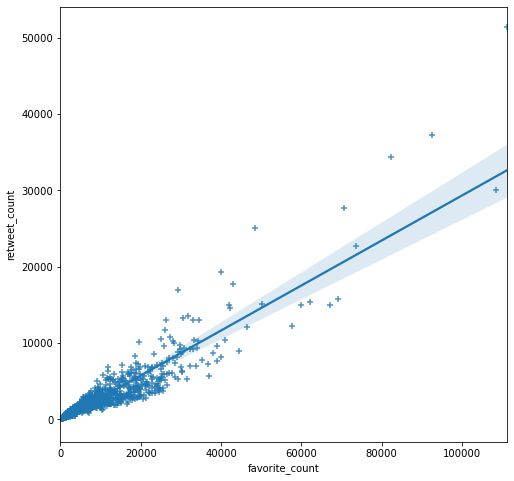

In [262]:
a = sns.regplot(x=twitter_archive_master['favorite_count'], y=twitter_archive_copy['retweet_count'], marker='+')
a.figure.set_size_inches(8,8)

Yes, the favorite and retweet counts are correlated

2. Most popular Dog breed
>Using only data from predictions being 'True' in p1

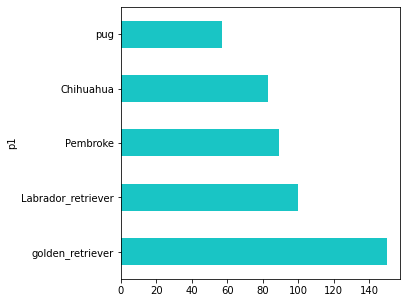

In [210]:
df_p1 = twitter_archive_master.query('p1_dog==True')
df_p1.value_counts('p1').nlargest(5).plot(kind='barh',color='c', alpha=0.9, figsize=(5,5));

In [260]:
df_p1['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
groenendael             1
standard_schnauzer      1
silky_terrier           1
clumber                 1
Japanese_spaniel        1
Name: p1, Length: 111, dtype: int64

'Golden_retriever' takes the lead

> Using only data from predictions being 'True' in p2

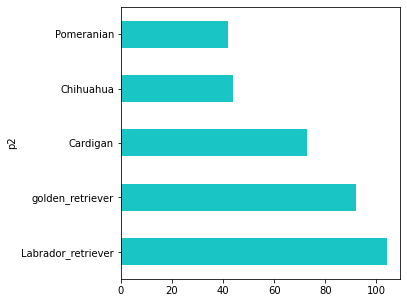

In [208]:
df_p2 = twitter_archive_master.query('p2_dog==True')
df_p2.value_counts('p2').nlargest(5).plot(kind='barh',color='c', alpha=0.9, figsize=(5,5));

In [257]:
df_p2['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
EntleBucher             1
Japanese_spaniel        1
Kerry_blue_terrier      1
standard_schnauzer      1
affenpinscher           1
Name: p2, Length: 113, dtype: int64

'Labrador_retriever' takes the lead with 'Golden_retriever' coming close

> Using only data from predictions being 'True' in p3

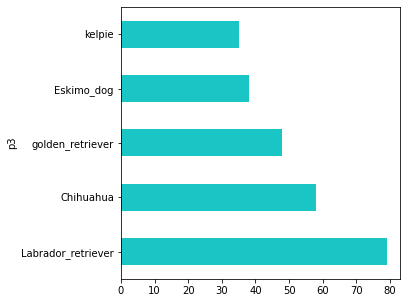

In [209]:
df_p3 = twitter_archive_master.query('p3_dog==True')
df_p3.value_counts('p3').nlargest(5).plot(kind='barh',color='c', alpha=0.9, figsize=(5,5));

In [258]:
df_p3['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
Walker_hound           2
standard_schnauzer     1
Sussex_spaniel         1
Kerry_blue_terrier     1
affenpinscher          1
Name: p3, Length: 116, dtype: int64

Labrador_retriever' takes the lead

3. What breed got the highest retweet and favorite counts using p1 predictions

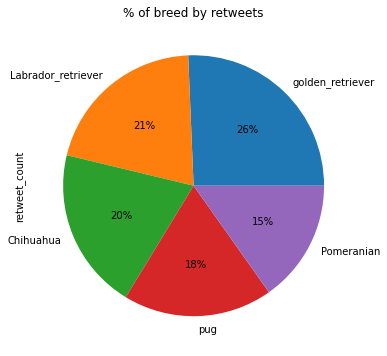

In [251]:
twitter_archive_master.groupby('p1')['retweet_count'].sum().nlargest(5).plot(kind='pie', autopct='%1.0f%%', figsize=(6,6), title='% of breed by retweets');

In descending order of retweets, the breeds are golden retriever, labrador retriever, chihuahua, pug, pomeranian

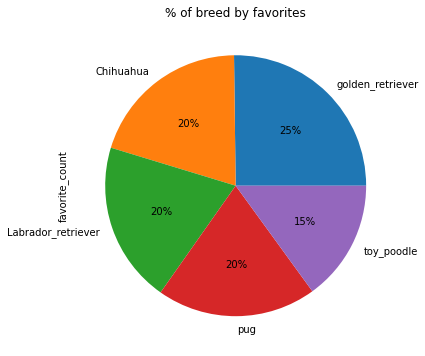

In [252]:
twitter_archive_master.groupby('p1')['favorite_count'].sum().nlargest(5).plot(kind='pie', autopct='%1.0f%%', figsize=(6,6), title='% of breed by favorites');

In descending order of favorites, the breeds are golden retriever, chihuahua, labrador retriever, pug, toy poodle

4. Most popular dog stage

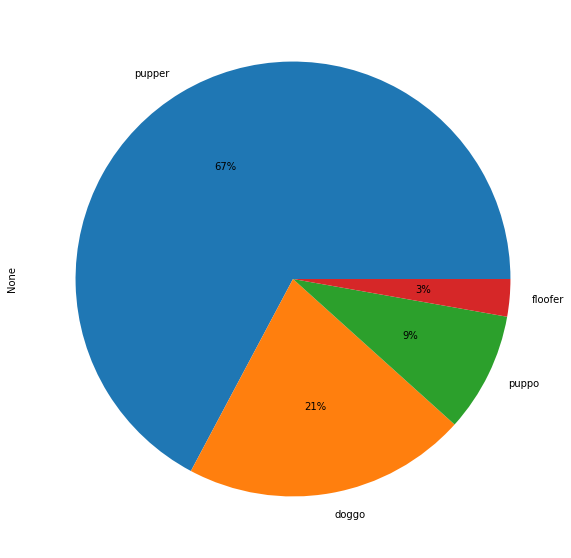

In [226]:
df_4 = twitter_archive_master.query('dog_stage=="pupper" or dog_stage=="doggo" or dog_stage=="puppo" or dog_stage=="floofer"')
df_4.value_counts('dog_stage').plot(kind='pie', autopct='%1.0f%%', figsize=(10,10));

Most popular dog stage is the pupper